In [70]:
import logging
import os
import sys
from configparser import ConfigParser
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for handling barcode tags with letters and numbers. 
from natsort import natsorted

# Allowing to run from git. 
gitpath=os.path.expanduser("~/git/mapseq-processing")
sys.path.append(gitpath)

gitpath=os.path.expanduser("~/git/cshlwork")
sys.path.append(gitpath)

from mapseq.core import * 
from mapseq.barcode import *
from cshlwork.utils import dataframe_to_seqlist, write_fasta_from_df, run_command_shell, NonZeroReturnException, setup_logging
from alignment.bowtie import run_bowtie, make_bowtie_df, make_adjacency_df

cp = get_default_config()
logging.getLogger().setLevel(logging.DEBUG)
sampleinfo = os.path.expanduser('~/project/mapseq/M229/Mseq229_sampleinfo.xlsx')
barcodes = os.path.expanduser('~/project/mapseq/M229/ssi_v2.txt')
outdir = os.path.expanduser('~/project/mapseq/M229/out')
infiles = [
    #os.path.expanduser('~/project/mapseq/M229/out/SSI281.44.counts.tsv'),
    #os.path.expanduser('~/project/mapseq/M229/out/SSI282.44.counts.tsv'),
    #os.path.expanduser('~/project/mapseq/M229/out/SSI283.44.counts.tsv'),
    #os.path.expanduser('~/project/mapseq/M229/out/SSI284.44.counts.tsv'),
    #os.path.expanduser('~/project/mapseq/M229/out/SSI285.44.counts.tsv'),
    os.path.expanduser('~/project/mapseq/M229/out/SSI287.44.counts.tsv'),
    #os.path.expanduser('~/project/mapseq/M229/out/SSI288.44.counts.tsv'),
          ]
print("Done")

Done


In [71]:
for infile in infiles:
    cdf = pd.read_csv(infile, sep='\t', index_col=0, keep_default_na=False, dtype =str, comment="#")
    cdf = fix_columns_int(cdf, ['counts'])
    cdf['logcounts'] = np.log(cdf.counts)
    
print(cdf)

2023-05-19 14:09:27,669 (UTC) [ DEBUG ] utils.py:192 root.fix_columns_int(): trying to fix col counts


                                           sequence  counts   label  logcounts
0      AGATGTGAATCCGTGATAGGAGGCCCCCGCCCATGAGGATGTCG      54  SSI287   3.988984
1      CCAGGAGGATGGGCTGCCCCAGCTTTAGTTTCGTTCGTGCTTGT      50  SSI287   3.912023
2      AGGCAGGGAAGAGGTGGAGTAGATGATGGGTCAACTGTTCCGGG      12  SSI287   2.484907
3      TGAGCTTAATGCTTGGGAGCGTGCTGGTGCTGTTTGATTTGGTC      10  SSI287   2.302585
4      AATCCAAAACGGCAGAAGCCTGAATGAGCTTACTGCTGGCGGAA       9  SSI287   2.197225
...                                             ...     ...     ...        ...
26067  AACACCAATCTTTCCAAGCAACAGCAGGTTTCAGAAGGGTAATA       1  SSI287   0.000000
26068  TTTACGAATAAAATCGAAGTGGACTGCTGGCGCGGTTAAATCCA       1  SSI287   0.000000
26069  GACGTTCTTACTGACGCAGAAGAAAACGTGCGGTAAAAATGTCT       1  SSI287   0.000000
26070  ATAAAACTCTGCAGGTTGGATACGCCAATCATTCGCAGTTCGCT       1  SSI287   0.000000
26071  TGACAGAATCGTTAGTTGATGGCGAAAGGTCGTGACAAATCTGT       1  SSI287   0.000000

[26072 rows x 4 columns]


In [72]:
cdf = threshold_counts(cp, cdf)
plotdf = cdf
plotdf['logcounts'] = np.log(plotdf.counts)
#sns.lineplot(data=plotdf, x= np.log(plotdf.index), y = 'logcounts')
#sns.lineplot(data=plotdf, x= plotdf.index, y = 'counts')
label = list(plotdf['label'].unique())[0]
label
plotdf

2023-05-19 14:09:31,210 (UTC) [ INFO ] core.py:384 root.threshold_counts(): thresh = 2


,sequence,counts,label,logcounts
0,AGATGTGAATCCGTGATAGGAGGCCCCCGCCCATGAGGATGTCG,54,SSI287,3.988984
1,CCAGGAGGATGGGCTGCCCCAGCTTTAGTTTCGTTCGTGCTTGT,50,SSI287,3.912023
2,AGGCAGGGAAGAGGTGGAGTAGATGATGGGTCAACTGTTCCGGG,12,SSI287,2.484907
3,TGAGCTTAATGCTTGGGAGCGTGCTGGTGCTGTTTGATTTGGTC,10,SSI287,2.302585
4,AATCCAAAACGGCAGAAGCCTGAATGAGCTTACTGCTGGCGGAA,9,SSI287,2.197225
...,...,...,...,...
7806,AGTGTGGATCTGTTAGAACGACCGCGTCAGTCTGTCCGTTTCTC,2,SSI287,0.693147
7807,CCTTTCTTTTTGGGGTAATTATACTCATCGCGGCTTCCATAAGC,2,SSI287,0.693147
7808,TGCGGTTATCCATCTGCTTATGGAAGCCAAGCTGGCGCTACTGC,2,SSI287,0.693147
7809,CGAAGTGGACTGCTGGCGGAAAATGAGAAAATTTACTCGTCAGA,2,SSI287,0.693147


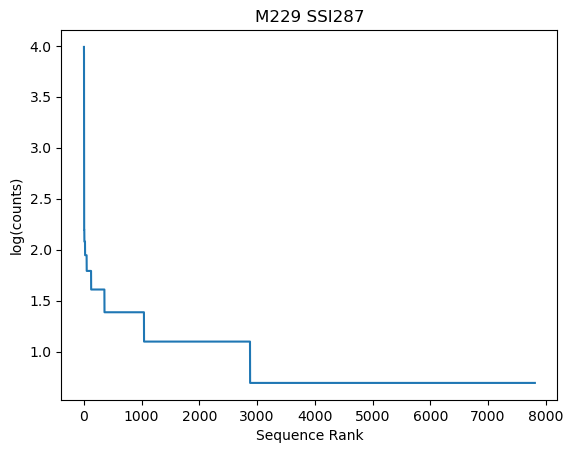

In [73]:
#sns.lineplot(data=plotdf, x= np.log(plotdf.index), y = 'logcounts')
ax = sns.lineplot(data=plotdf, x= plotdf.index, y = 'logcounts')
ax.set(xlabel='Sequence Rank',
      ylabel='log(counts)',
      title = f'M229 {label}')

plt.show()
